#Import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 12)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix

#Load Data

In [39]:
bank = pd.read_csv('bank-additional.csv', sep=';', na_values=['unknown'])
bankfull = pd.read_csv('bank-additional-full.csv', sep=';',  na_values=['unknown'])

In [40]:
bank = pd.concat([bank, bankfull])
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#Preprocessing

In [41]:
bank.isnull().sum()

age                  0
job                369
marital             91
education         1898
default           9400
housing           1095
loan              1095
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [42]:
bank.dropna(subset=['job', 'marital', 'education', 'default', 'housing', 'loan'], inplace=True)

In [43]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [44]:
bank.duplicated().sum()

3100

In [45]:
bank.drop_duplicates(inplace=True)
bank.duplicated().sum()

0

In [46]:
# mendefinisikan labelencoder
labelencoder = LabelEncoder()

# mendefinisikan list yang berisi kolom yang akan diganti menjadi label
labelencoder_column = ['job', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
for column in labelencoder_column:
    bank[column] = labelencoder.fit_transform(bank[column]) # mengganti categorical object menjadi numerik

In [47]:
dict_edu = {'illiterate': 0, 'basic.4y':1, 'basic.6y':1, 'basic.9y':1, 'high.school':2, 'professional.course':3, 'university.degree':4}
bank['education'] = bank['education'].map(dict_edu)

In [48]:
dict_marital = {'single': 0, 'married':1, 'divorced':2}
bank['marital'] = bank['marital'].map(dict_marital)

In [49]:
dict_month = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}
bank['month'] = bank['month'].map(dict_month)

In [50]:
dict_dayofweek = {'mon': 0, 'tue': 1, 'wed': 2, 'thu':3, 'fri':4}
bank['day_of_week'] = bank['day_of_week'].map(dict_dayofweek)

In [51]:
X = bank.iloc[:,:-1] # memasukkan kolom-kolom fitur ke X 
y = bank['y'] # memasukkan kolom y(target) ke y

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [53]:
X_train.shape, X_test.shape

((21334, 20), (9144, 20))

In [54]:
X_train = StandardScaler().fit_transform(X_train)

In [55]:
X_test = StandardScaler().fit_transform(X_test)

#Modeling

##Logistic Regression

In [56]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [57]:
model_LR.score(X_test, y_test)

0.9048556430446194

In [81]:
y_predict_LR = model_LR.predict(X_test)
y_predict_LR

array([0, 0, 0, ..., 0, 0, 0])

##K-Nearest Neighbors

In [59]:
model_KNN = KNeighborsClassifier(n_neighbors = 5)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
model_KNN.score(X_test, y_test)

0.8906386701662292

In [80]:
y_predict_KNN = model_KNN.predict(X_test)
y_predict_KNN

array([0, 0, 0, ..., 0, 0, 1])

##Support Vector Machine

In [62]:
model_SVM = SVC()
model_SVM.fit(X_train, y_train)

SVC()

In [63]:
model_SVM.score(X_test, y_test)

0.9013560804899388

In [79]:
y_predict_SVM = model_SVM.predict(X_test)
y_predict_SVM

array([0, 0, 0, ..., 0, 0, 0])

##Decision Tree

In [65]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
model_DT.score(X_test, y_test)

0.8663604549431321

In [78]:
y_predict_DT = model_DT.predict(X_test)
y_predict_DT

array([0, 0, 1, ..., 0, 0, 0])

##Random Forest

In [68]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
model_RF.score(X_test, y_test)

0.9044181977252843

In [77]:
y_predict_RF = model_RF.predict(X_test)
y_predict_RF

array([0, 0, 0, ..., 0, 0, 0])

##Naive Bayes

In [71]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [72]:
model_NB.score(X_test, y_test)

0.8776246719160105

In [74]:
y_predict_NB = model_NB.predict(X_test)
y_predict_NB

array([0, 0, 0, ..., 0, 0, 0])

##Confusion Matrix

###Naive Bayes

In [76]:
cm_NB = confusion_matrix(y_test,y_predict_NB)
print(cm_NB)

[[8025    0]
 [1119    0]]


###Random Forest

In [82]:
cm_RF = confusion_matrix(y_test,y_predict_RF)
print(cm_RF)

[[7664  361]
 [ 513  606]]


###Decision Tree

In [83]:
cm_DT = confusion_matrix(y_test,y_predict_DT)
print(cm_DT)

[[7345  680]
 [ 542  577]]


###Support Vector Machine

In [84]:
cm_SVM = confusion_matrix(y_test,y_predict_SVM)
print(cm_SVM)

[[7809  216]
 [ 686  433]]


### K-Nearest Neighbors

In [85]:
cm_KNN = confusion_matrix(y_test,y_predict_KNN)
print(cm_KNN)

[[7692  333]
 [ 667  452]]


###Logistic Regression

In [86]:
cm_LR = confusion_matrix(y_test,y_predict_LR)
print(cm_LR)

[[7803  222]
 [ 648  471]]


#Visualization

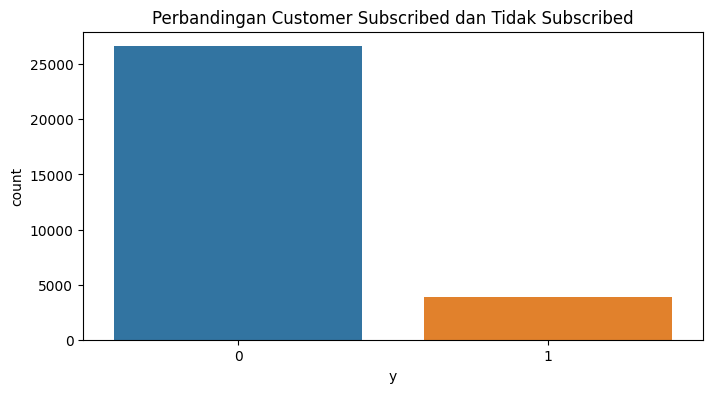

In [88]:
plt.figure(figsize=(8,4))
sns.countplot(x='y', data=bank)
plt.title('Perbandingan Customer Subscribed dan Tidak Subscribed', y=1)
plt.xlabel('y')
plt.show()

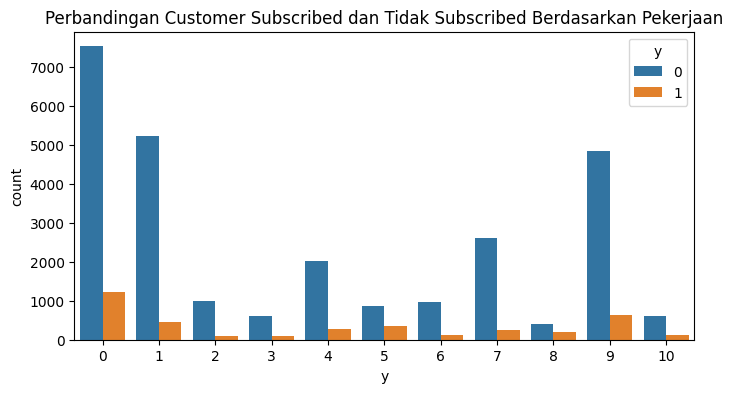

In [92]:
plt.figure(figsize=(8,4))
sns.countplot(x=bank['job'], hue=bank['y'])
plt.title('Perbandingan Customer Subscribed dan Tidak Subscribed Berdasarkan Pekerjaan', y=1)
plt.xlabel('y')
plt.show()

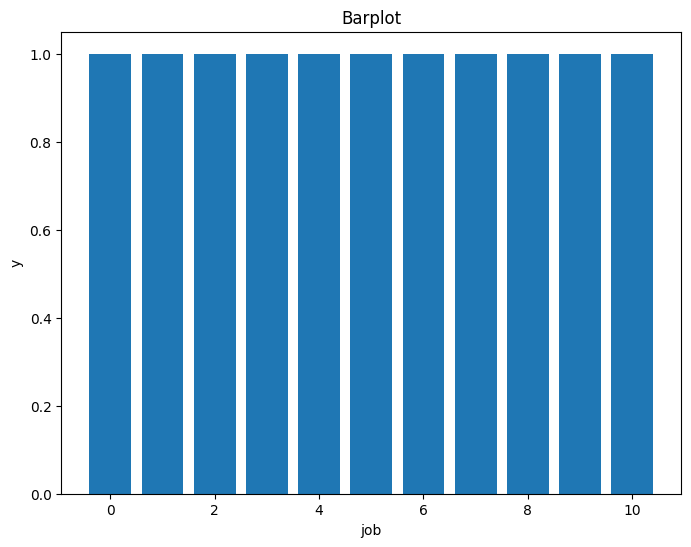

In [98]:
x=bank['job']
y=bank['y']
plt.figure(figsize=(8,6))
plt.bar(x,y)
plt.title("Barplot")
plt.xlabel('job')
plt.ylabel('y')
plt.show()

#Kesimpulan

In [99]:
score_LR = model_LR.score(X_test, y_test)
score_KNN = model_KNN.score(X_test, y_test)
score_SVM = model_SVM.score(X_test, y_test)
score_DT = model_DT.score(X_test, y_test)
score_RF = model_RF.score(X_test, y_test)
score_NB = model_NB.score(X_test, y_test)
print('Logistic Regression : ',score_LR)
print('K-Nearest Neighbors : ',score_KNN)
print('Support Vector Machine : ',score_SVM)
print('Decision Tree : ',score_DT)
print('Random Forest : ',score_RF)
print('Naive Bayes : ',score_NB)

Logistic Regression :  0.9048556430446194
K-Nearest Neighbors :  0.8906386701662292
Support Vector Machine :  0.9013560804899388
Decision Tree :  0.8663604549431321
Random Forest :  0.9044181977252843
Naive Bayes :  0.8776246719160105


Berdasarkan accurasy score dari setiap model, didapatkan accurasy score tertinggi yakni 90,48% dengan menggunakan model Logistic Regression. Jadi, untuk dataset bank model yang paling bagus yakni Logistic Regression.